# 第１章　基本的なクラスタリングを行う10本ノック

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.data.shape

(150, 4)

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
df_ilis = pd.DataFrame(iris.data, columns=iris.feature_names)
df_ilis

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df_ilis.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


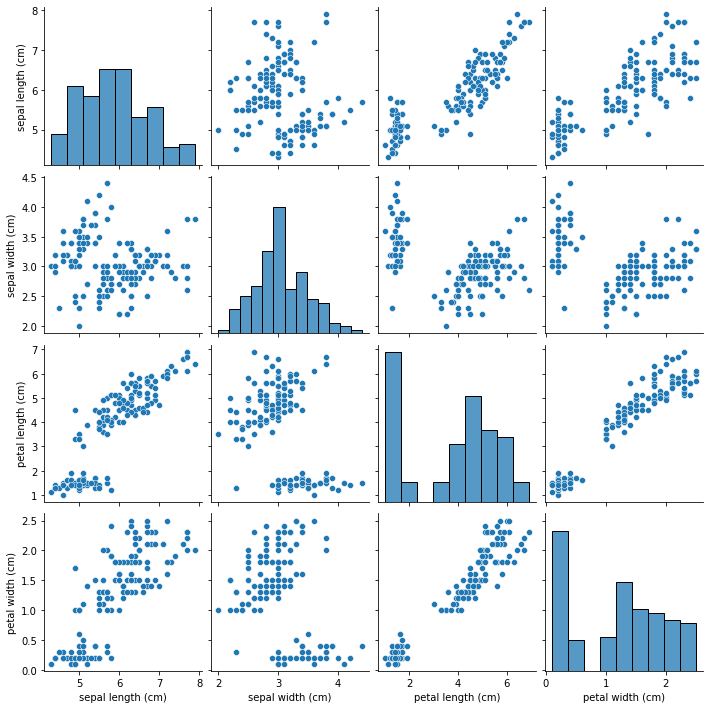

In [8]:
import seaborn as sns
df_temp = df_ilis.copy()
sns.pairplot(df_temp)

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init="random")
cls_data = df_ilis.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [10]:
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


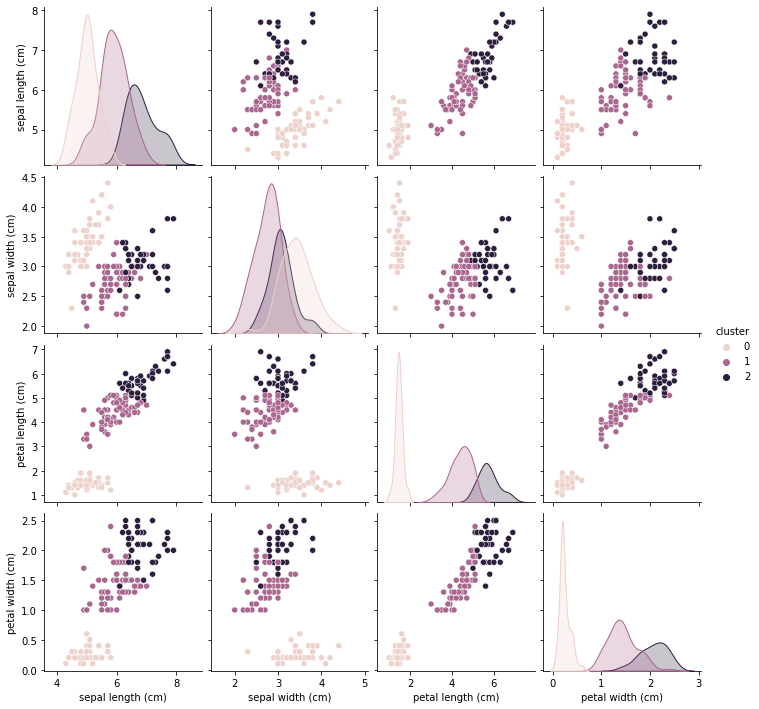

In [11]:
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [12]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [13]:
cls_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster'],
      dtype='object')

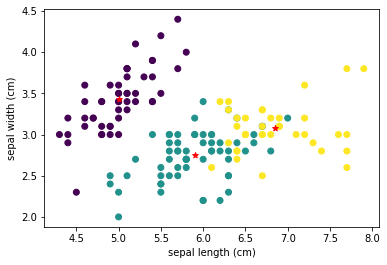

In [14]:
plt.scatter(cls_data['sepal length (cm)'],cls_data['sepal width (cm)'], c=cls_data['cluster'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(cluster_center['sepal length (cm)'],cluster_center['sepal width (cm)'], marker='*', color="red")

In [15]:
display(cls_data.groupby('cluster').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [16]:
cls_data['target'] = iris.target
cls_data.loc[cls_data['target']==0, 'target'] = 'setosa'
cls_data.loc[cls_data['target']==1, 'target'] = 'versicolor'
cls_data.loc[cls_data['target']==2, 'target'] = 'virginica'
display(cls_data.groupby('target').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


## ノック2:クラスタリングの結果を評価してみよう

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data['cluster']))
accuracy = "Accuracy: {:.2f}".format(accuracy_score(iris.target, cls_data['cluster']))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.89


## ノック3:k-means++で非階層型クラスタリングを実施してみよう




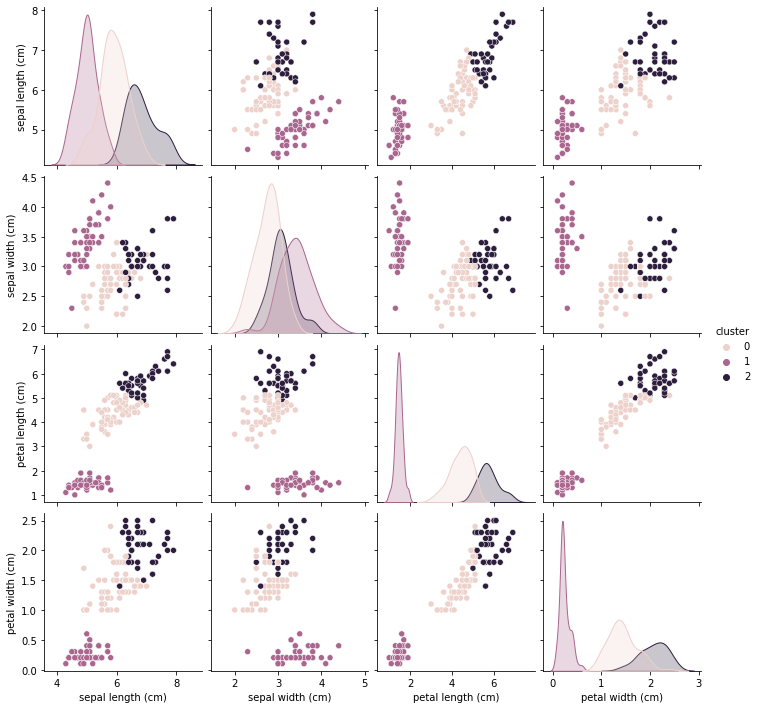

In [18]:
model = KMeans(n_clusters=3, random_state=0, init="k-means++")
cls_data = df_ilis.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [19]:
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data['cluster']))
print(ari)

ARI: 0.73


ARI: 0.54


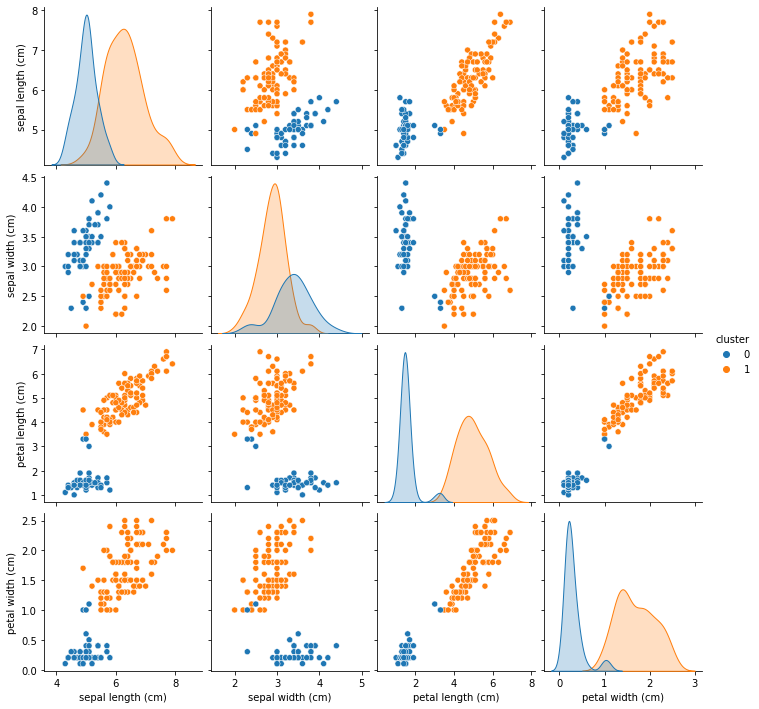

In [20]:
model = KMeans(n_clusters=2, random_state=0)
cls_data = df_ilis.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data['cluster']))
print(ari)

## ノック4:エルボー法で最適なクラスター数を探索してみよう  




<function matplotlib.pyplot.show(*args, **kw)>

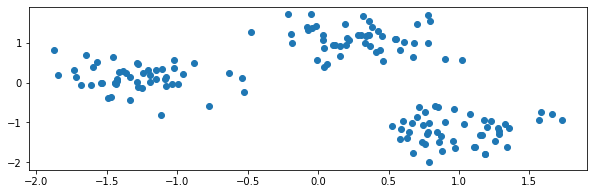

In [21]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing

X,y = make_blobs(
    n_samples=150,  # サンプル数
    n_features=2,     # 特徴量数
    centers=3,        # クラスタ数
    cluster_std=0.5,    # 標準偏差
    shuffle=True,       # シャッフル
    random_state=0    # 乱数生成器
)

# 変数の標準化(平均値=0, 分散=1)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X) 
x1=X_norm[:, 0] # 0列目
y1=X_norm[:, 1] # 1列目

plt.figure(figsize=(10,3))  # 生成するグラフの縦横比
plt.scatter(x1, y1) # 散布図
plt.show

In [22]:
# クラスタ内の残差平方和（SSE）の取得。残差が小さい程適切にクラスタリングできるていることを示す。
distoritions = []
for i in range(1, 11):
  km = KMeans(
      n_clusters=i,     # クラスタ数
      n_init=10,
      max_iter=300,
      random_state=0
  )
  km.fit(X)
  distoritions.append(km.inertia_)

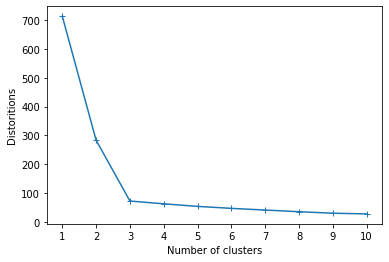

In [23]:
# 残差のグラフ化(エルボー図)
plt.plot(range(1,11), distoritions, marker="+") # 折れ線グラフ
plt.xticks(range(1,11)) # x軸の幅
plt.xlabel('Number of clusters')
plt.ylabel('Distoritions')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

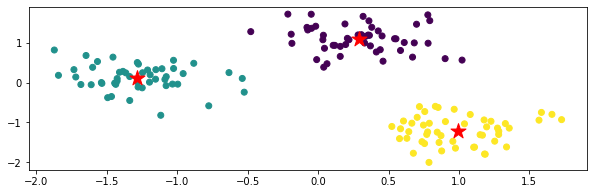

In [24]:
# 残差が急激に下がった境界のクラスタ数が最適と判断してクラスタリング実施
km = KMeans(
    n_clusters=3,     # クラスタ数(↑急激に下がった時のクラスタ数)
    n_init=10,
    max_iter=300,
    random_state=0
)
z_km=km.fit(X_norm)
plt.figure(figsize=(10,3))  # 生成するグラフの縦横比
plt.scatter(x1, y1, c=z_km.labels_) # 散布図
# クラスタの中心点の散布図
plt.scatter(
    z_km.cluster_centers_[:,0], 
    z_km.cluster_centers_[:,1], 
    s=250,
    marker='*',
    c='red')
plt.show

## ノック5:シルエット分析で最適なクラスター数を探索してみよう




In [25]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels=np.unique(z_km.labels_)  # 残差確認後のクラスタ数で分類した後のクラスタの一意
n_clusters=cluster_labels.shape[0]  # クラスタの要素数
silhouette_vals=silhouette_samples(X, z_km.labels_)

50
50
50


([<matplotlib.axis.YTick at 0x7f4c6e7975d0>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

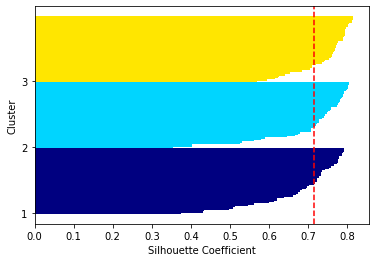

In [26]:
y_ax_lower, y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(
      range(y_ax_lower, y_ax_upper),
      c_silhouette_vals,
      height=1,
      edgecolor=None,
      color=color
  )
  yticks.append((y_ax_lower+y_ax_lower)/2.)
  y_ax_lower+=len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.yticks(yticks, cluster_labels + 1)

<function matplotlib.pyplot.show(*args, **kw)>

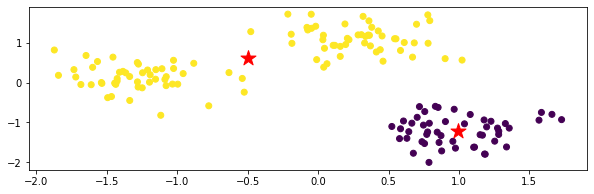

In [27]:
# クラスタ数２で3との比較
km = KMeans(
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=0
)
z_km=km.fit(X_norm)
plt.figure(figsize=(10,3))  # 生成するグラフの縦横比
plt.scatter(x1, y1, c=z_km.labels_) # 散布図
# クラスタの中心点の散布図
plt.scatter(
    z_km.cluster_centers_[:,0], 
    z_km.cluster_centers_[:,1], 
    s=250,
    marker='*',
    c='red')
plt.show

50
100
0


([<matplotlib.axis.YTick at 0x7f4c6d15c3d0>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

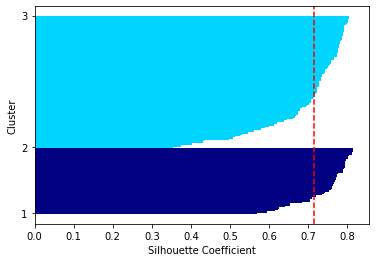

In [28]:
y_ax_lower, y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(
      range(y_ax_lower, y_ax_upper),
      c_silhouette_vals,
      height=1,
      edgecolor=None,
      color=color
  )
  yticks.append((y_ax_lower+y_ax_lower)/2.)
  y_ax_lower+=len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.yticks(yticks, cluster_labels + 1)

## ノック6:階層型クラスタリングを実施してみよう

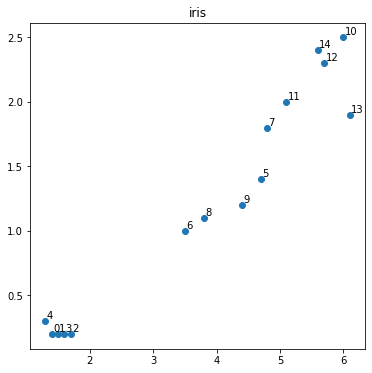

In [31]:
X=load_iris().data[::10, 2:4]

fig = plt.figure(figsize=(6,6))  # 生成するグラフの縦横比
ax = fig.add_subplot(1, 1, 1, title='iris')
plt.scatter(X[:, 0], X[:, 1]) # 散布図生成
for i, element in enumerate(X):
  plt.text(element[0]+0.02, element[1]+0.02, i)

plt.show()

In [33]:
from sklearn import metrics
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='ward', metric='euclidean')
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


## ノック7:樹形図(デンドログラム)を解釈してみよう

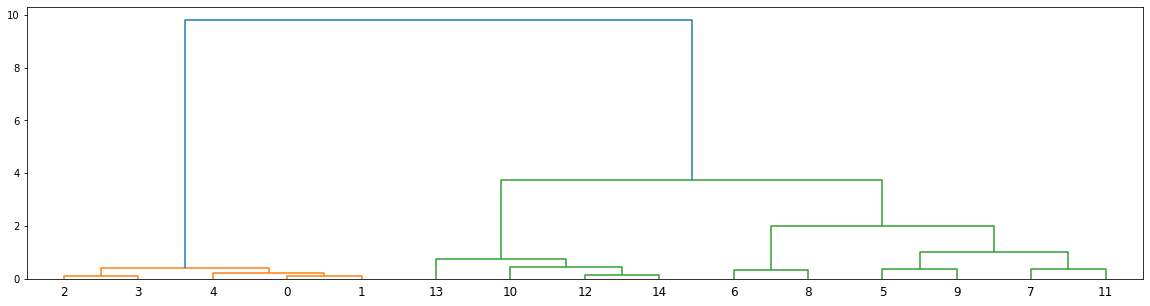

In [34]:
from scipy.cluster.hierarchy import dendrogram
fig2, ax2 = plt.subplots(figsize=(20, 5))
ax2 = dendrogram(Z)
fig2.show() 

In [35]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion='maxclust')
for i, c in enumerate(clusters):
  print(i, c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


In [38]:
clusters_dist = fcluster(Z, t=1.6, criterion='distance')
for i, c in enumerate(clusters_dist):
  print(i, c)

0 1
1 1
2 1
3 1
4 1
5 4
6 3
7 4
8 3
9 4
10 2
11 4
12 2
13 2
14 2


## ノック8:最短距離法で階層型クラスタリングを実施してみよう

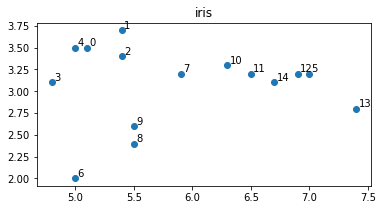

In [39]:
X=load_iris().data[::10]

fig = plt.figure(figsize=(6,3))  # 生成するグラフの縦横比
ax = fig.add_subplot(1, 1, 1, title='iris')
plt.scatter(X[:, 0], X[:, 1]) # 散布図生成
for i, element in enumerate(X):
  plt.text(element[0]+0.02, element[1]+0.02, i)

plt.show()

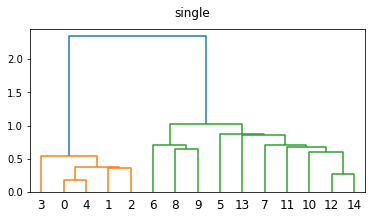

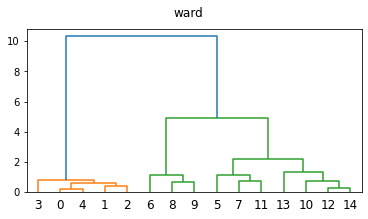

In [40]:
Z = linkage(X, method='single', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6, 3))
ax2 = dendrogram(Z)
fig2.suptitle('single')
fig2.show() 

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6, 3))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show() 

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

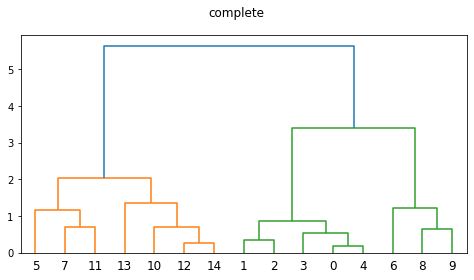

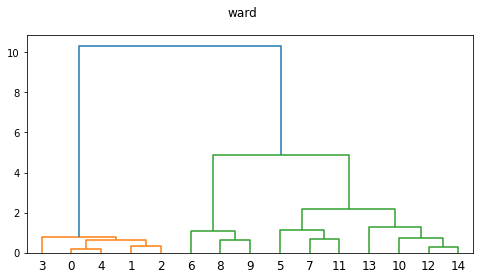

In [41]:
Z = linkage(X, method='complete', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2 = dendrogram(Z)
fig2.suptitle('complete')
fig2.show() 

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show() 

## ノック10:群平均法で階層型クラスタリングを実施してみよう

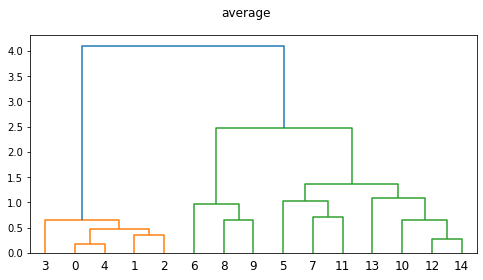

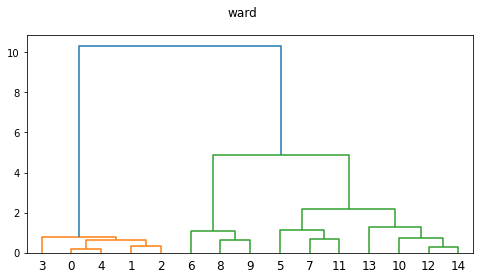

In [42]:
Z = linkage(X, method='average', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2 = dendrogram(Z)
fig2.suptitle('average')
fig2.show() 

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show() 